# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the dataset

In [2]:
df=pd.read_csv('admission_predict.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Data preprocessing

In [4]:
#the iolc function of pandas library is used to access the data from rows and columns using the index function
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [5]:
print(x)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [6]:
print(y)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

In [7]:
#feature scaling the y
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [8]:
#apply pca to the model
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
# since we do not know the explained variance of the x variables/columns
# we keep n_components value = None
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.67519343 0.10596446 0.08023255 0.0543379  0.03766808 0.02546844
 0.02113513]


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# since we do not know the explained variance of the x variables/columns
# we keep n_components value = None
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.67519343 0.10596446 0.08023255]


In [10]:
#since pca is done we will be splitting x and y  into training and test model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
#applying MLR
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
#predicting the value of y
y_pred=lr.predict(x_test)

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('r2_score=',r2)
print('mae=',mae)
print('mse=',mse)
print('rmse=',rmse)

r2_score= 0.7748282322004203
mae= 0.04838073113711645
mse= 0.0042446485055955795
rmse= 0.06515096703499941


In [14]:
print(y_pred)

[0.69743497 0.81838686 0.76074688 0.89913244 0.61107737 0.66492584
 0.52401963 0.69343311 0.50168205 0.7201763  0.61856527 0.70910233
 0.60544791 0.733734   0.90805008 0.5081635  0.81957099 0.63856176
 0.74361765 0.52350875 0.52080257 0.72496814 0.51943732 0.93006234
 0.85051147 0.70231285 0.7514263  0.50639742 0.58202112 0.57605055
 0.65852626 0.51900213 0.64567748 0.84043762 0.59615398 0.61577295
 0.8363957  0.85929935 0.60333578 0.63617271 0.65528449 0.89361029
 0.87363776 0.72306581 0.78273213 0.80152584 0.96580136 0.83829665
 0.65080695 0.66917683 0.60658671 0.63046426 0.59750081 0.77690689
 0.70458369 0.85003543 0.53200326 0.84727909 0.60711413 0.64673425
 0.52429223 0.90730212 0.60402609 0.8873203  0.688634   0.61599189
 0.74786478 0.84847532 0.50055372 0.76798212 0.89728047 0.78762081
 0.70164068 0.69182687 0.81022269 0.92929739 0.74767597 0.7428377
 0.57917698 0.63551851 0.60921167 0.86501076 0.58435936 0.66892753
 0.79339529 0.5535387  0.79049031 0.60274849 0.48808434 0.70070

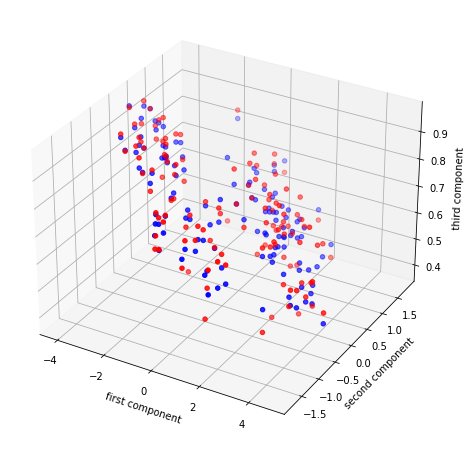

In [15]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection="3d")
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,color='red')
ax.scatter3D(x_test[:,0],x_test[:,1],y_pred,color='blue')
ax.set_xlabel('first component')
ax.set_ylabel('second component')
ax.set_zlabel('third component')
plt.show()

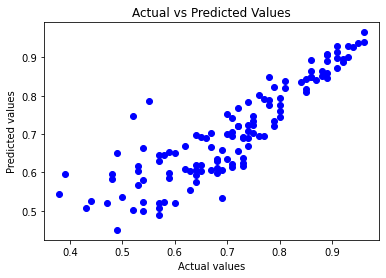

In [16]:
#ploting the graph for Actual vs predicting
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title("Actual vs Predicted Values")
plt.show()